In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [3]:
print(datax.shape)
print(datay.shape)

(60000, 28, 28)
(60000,)


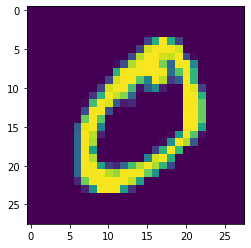

In [4]:
img = plt.imshow(datax[1])

In [5]:
datax_reshape = datax.reshape([datax.shape[0], datax.shape[1] * datax.shape[2]])
print(datax_reshape.shape)                                 

(60000, 784)


In [6]:
print(datax_reshape[0,0:300]) 
print(datay[0:30]) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [7]:
datax_reshape_norm = datax_reshape/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))

최대 : 1.0, 최소 : 0.0


In [8]:
idx1= np.where(datay == 4)
idx2= np.where(datay == 2)
idx12= np.union1d(idx1,idx2)

In [9]:
datax_train = datax_reshape_norm[idx12, :]
datay_train = datay[idx12]
print(datax_train.shape)
print(datay_train.shape)

(11800, 784)
(11800,)


In [10]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_train, datay_train, test_size= 0.35, random_state = 42)

In [18]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,10,))
clf.fit(trnx,trny)
tsty_hat = clf.predict(tstx)

In [19]:
print(clf)
print(clf.loss_curve_)
print(tsty[0:100])
print(tsty_hat[0:100])

MLPClassifier(hidden_layer_sizes=(100, 10))
[2.1520450543961207, 0.8346070494574126, 0.5276160282623945, 0.39681742676165993, 0.3291003963551874, 0.28289560217477594, 0.2522406486723802, 0.22437986245275957, 0.20328034051889404, 0.18470080124515448, 0.17058765043163615, 0.15523516953034305, 0.1426745992476061, 0.13139472235313107, 0.12026223113187902, 0.11182343946240589, 0.10308726320254158, 0.09456562442292708, 0.08791229148311444, 0.08003054094042435, 0.072359970086349, 0.0669561268791523, 0.06119112831942527, 0.057297896481835094, 0.05179793386115453, 0.04623318999510303, 0.04330416365721541, 0.03963787578939733, 0.03663509602847275, 0.03359616821466967, 0.029438447925993348, 0.027030528350762768, 0.0236101261199762, 0.022423059081525514, 0.02007909873890404, 0.018208446025160925, 0.01601277807111082, 0.014347570945238416, 0.01347504352063265, 0.015052509262012495, 0.011577419406232055, 0.01048888693921068, 0.008063876302221502, 0.006651883045003596, 0.006496712210386465, 0.0063471

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(tsty, tsty_hat)

0.9900726392251816

In [14]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
datay_onehot = encoder.fit_transform(datay)
print(datay[0:10])
print(datay_onehot[0:10, 0:10])


[5 0 4 1 9 2 1 3 1 4]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


In [15]:
### TEST CODE ###
print(datax_reshape_norm.shape)
print(datay_train.shape)
### TEST CODE ###

(60000, 784)
(11800,)


In [16]:
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size= 0.25, random_state = 42)

In [17]:
clf2 = MLPClassifier(hidden_layer_sizes=(10,15,10,20))
clf2.fit(trnx,trny)
tsty_hat2 = clf2.predict(tstx)

In [20]:
tsty_argmax = np.argmax(tsty, axis=1)
tsty_hat_argmax = np.argmax(tsty_hat2, axis=1)
print(tsty_argmax[0:10])
print(tsty_hat_argmax[0:10])

[7 3 8 9 3 9 7 7 5 4]
[7 3 8 9 3 9 7 7 5 4]


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(tsty_argmax, tsty_hat_argmax)

0.9142

In [22]:
clf2.predict_proba(tstx)

array([[7.34142372e-07, 5.18659492e-09, 1.38392055e-05, ...,
        9.99766532e-01, 1.50215212e-04, 2.62331812e-04],
       [7.56602981e-29, 2.35727416e-11, 3.22890049e-07, ...,
        5.92994550e-28, 1.66614033e-08, 4.94696437e-06],
       [9.49404588e-05, 3.73341360e-05, 5.91938791e-04, ...,
        8.12562221e-08, 9.99407899e-01, 4.08691494e-05],
       ...,
       [6.49688645e-12, 2.44072738e-11, 1.43505038e-05, ...,
        9.99999726e-01, 2.34614932e-07, 3.86793134e-06],
       [2.61177216e-14, 1.11810911e-01, 3.33655056e-05, ...,
        5.11946431e-06, 4.23335996e-03, 2.23997266e-05],
       [9.98631474e-01, 7.16555658e-09, 1.17662299e-06, ...,
        9.91208044e-08, 5.35890959e-06, 8.26755783e-04]])